In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('output_data/history_data_5_files.csv')
data.head()

,id,name,organisation,startdate,enddate,number_of_participants,number_of_waste_bags,kg_of_collected_waste,handout_gloves,handout_wastebags,...,geom_wkt,personal_use,fisheries,industrial,hygiene,others,created_at,created_by,updated_at,updated_by
0,1,Leangbukta,NaN,3/5/2016 02:00:00,3/5/2016 02:00:00,18,0,500,NaN,NaN,...,POINT(10.4748630523682 59.8320283584922),0,0,0,0,0,6/10/2023 19:59:50,NaN,6/10/2023 19:59:50,NaN
1,2,Hukodden,NaN,11/5/2016 02:00:00,11/5/2016 02:00:00,1,0,5,NaN,NaN,...,POINT(10.6777667999268 59.894636561617),0,0,0,0,0,6/10/2023 19:59:50,NaN,6/10/2023 19:59:50,NaN
2,3,Frierstranda,NaN,5/9/2016 02:00:00,5/9/2016 02:00:00,15,0,50,NaN,NaN,...,POINT(9.64797019958497 59.1055054876966),0,0,0,0,0,6/10/2023 19:59:50,NaN,6/10/2023 19:59:50,NaN
3,4,Sølyst,NaN,18/9/2016 02:00:00,18/9/2016 02:00:00,15,0,110,NaN,NaN,...,POINT(5.7429313659668 58.9787365083173),236,11,1,505,501,6/10/2023 19:59:50,NaN,6/10/2023 19:59:50,NaN
4,5,Kjerkvågen,NaN,9/7/2016 02:00:00,9/7/2016 02:00:00,5,0,40,NaN,NaN,...,POINT(12.0842206478119 66.5051837891961),0,0,0,0,0,6/10/2023 19:59:50,NaN,6/10/2023 19:59:50,NaN


In [3]:
data.shape

(25039, 27)

### Detect the abnormal data and remove outliers

In [51]:
# Check whether there is negative value
negative_condition = (data['kg_of_collected_waste'] < 0) | \
            (data['personal_use'] < 0) | \
            (data['fisheries'] < 0) | \
            (data['industrial'] < 0) | \
            (data['hygiene'] < 0) | \
            (data['others'] < 0)
ng_data = data[negative_condition]
ng_data

,id,name,organisation,startdate,enddate,number_of_participants,number_of_waste_bags,kg_of_collected_waste,handout_gloves,handout_wastebags,...,fisheries,industrial,hygiene,others,created_at,created_by,updated_at,updated_by,year,month


In [13]:
# Identify rows where 'kg_of_collected_waste' equals 0
ab_data = data[data['kg_of_collected_waste'] == 0]
ab_data.shape


(7179, 27)

In [52]:
# Calculate the sum of the specified columns and assign it to 'kg_of_collected_waste' where it equals 0
data.loc[data['kg_of_collected_waste'] == 0, 'kg_of_collected_waste'] = (
    data.loc[data['kg_of_collected_waste'] == 0, ['personal_use', 'fisheries', 'industrial', 'hygiene', 'others']]
    .sum(axis=1)
)

# Check if the assignment worked by displaying some of the modified rows
data[data['kg_of_collected_waste'] == 0].head(), data.loc[ab_data.index].head()

(Empty DataFrame
 Columns: [id, name, organisation, startdate, enddate, number_of_participants, number_of_waste_bags, kg_of_collected_waste, handout_gloves, handout_wastebags, municipality, county, municipality_name, county_name, meters_cleaned_beach, teiner, oljefat, geom_wkt, personal_use, fisheries, industrial, hygiene, others, created_at, created_by, updated_at, updated_by, year, month]
 Index: []
 
 [0 rows x 29 columns],
 Empty DataFrame
 Columns: [id, name, organisation, startdate, enddate, number_of_participants, number_of_waste_bags, kg_of_collected_waste, handout_gloves, handout_wastebags, municipality, county, municipality_name, county_name, meters_cleaned_beach, teiner, oljefat, geom_wkt, personal_use, fisheries, industrial, hygiene, others, created_at, created_by, updated_at, updated_by, year, month]
 Index: []
 
 [0 rows x 29 columns])

In [53]:
# Identify rows where 'kg_of_collected_waste' equals 0
ab_data = data[data['kg_of_collected_waste'] == 0]
ab_data.shape

(0, 29)

In [54]:
# check whether there is kg_of_collected_waste = 0 but all the categories not equal to 0
ab_data_check = data[data['kg_of_collected_waste'] == 0]
ab_condition = (data['personal_use'] != 0) | \
            (data['fisheries'] != 0) | \
            (data['industrial'] != 0) | \
            (data['hygiene'] != 0) | \
            (data['others'] != 0)
ab_data_check = ab_data[ab_condition]
ab_data_check.shape

/var/folders/4g/fzwy7zvn4n7_mt0hzjjtkfw40000gn/T/ipykernel_3616/4059661569.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ab_data_check = ab_data[ab_condition]


(0, 29)

In [20]:
# ab_data.index

In [17]:
# drop the ab_data as there are only 146 rows
# data.drop(ab_data.index)

In [55]:
# Preprocess data to extract year and month
data['startdate'] = pd.to_datetime(data['startdate'], errors='coerce')
data['year'] = data['startdate'].dt.year
data['month'] = data['startdate'].dt.month

In [56]:
# Delete the abnormal data in Jan
# Analyze January data to identify any outlier value
january_data = data[data['month'] == 1]['kg_of_collected_waste']

# Calculate basic statistics for January data
january_stats = january_data.describe()

# Identify potential outlier by looking at values far from the mean, considering the standard deviation
std_multiplier = 3  # Commonly used multiplier in outlier detection
potential_outliers_threshold = january_stats['mean'] + (january_stats['std'] * std_multiplier)

# Filter out potential outlier(s)
potential_outliers_january = january_data[january_data > potential_outliers_threshold]

potential_outliers_january

6903     140000
6904     198000
20886    687030
20898    687030
Name: kg_of_collected_waste, dtype: int64

In [57]:
# delete the potiental outliers
data_cleaned = data.drop(potential_outliers_january.index)

# Jan stats after removing outliers
january_data_cleaned = data_cleaned[data_cleaned['month'] == 1]['kg_of_collected_waste']
january_stats_cleaned = january_data_cleaned.describe()

january_stats_cleaned

count      965.000000
mean       657.765803
std       2198.100634
min          1.000000
25%         50.000000
50%        150.000000
75%        400.000000
max      41320.000000
Name: kg_of_collected_waste, dtype: float64

In [58]:
data = data_cleaned

In [59]:
# Filtering the dataset based on the specified conditions
data = data[data['kg_of_collected_waste'] != 0]
condition = (data['personal_use'] == 0) & \
            (data['fisheries'] == 0) & \
            (data['industrial'] == 0) & \
            (data['hygiene'] == 0) & \
            (data['others'] == 0) & \
            (data['kg_of_collected_waste'] != 0)

missing_data = data[condition]

# Analyzing the missing values in 'personal_use' under these conditions
missing_values_analysis = {
    'Total Rows': len(data),
    'Missing Values in personal_use': missing_data['personal_use'].count(),
    'Percentage of Missing Values': missing_data['personal_use'].count()/len(data) * 100
}

missing_values_analysis

{'Total Rows': 18002,
 'Missing Values in personal_use': 11148,
 'Percentage of Missing Values': 61.92645261637596}

### Get the activities intensity level from whole data and assign weigtage accordingly 

/var/folders/4g/fzwy7zvn4n7_mt0hzjjtkfw40000gn/T/ipykernel_3616/1600082898.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='activities_count', data=monthly_activities, palette='muted')


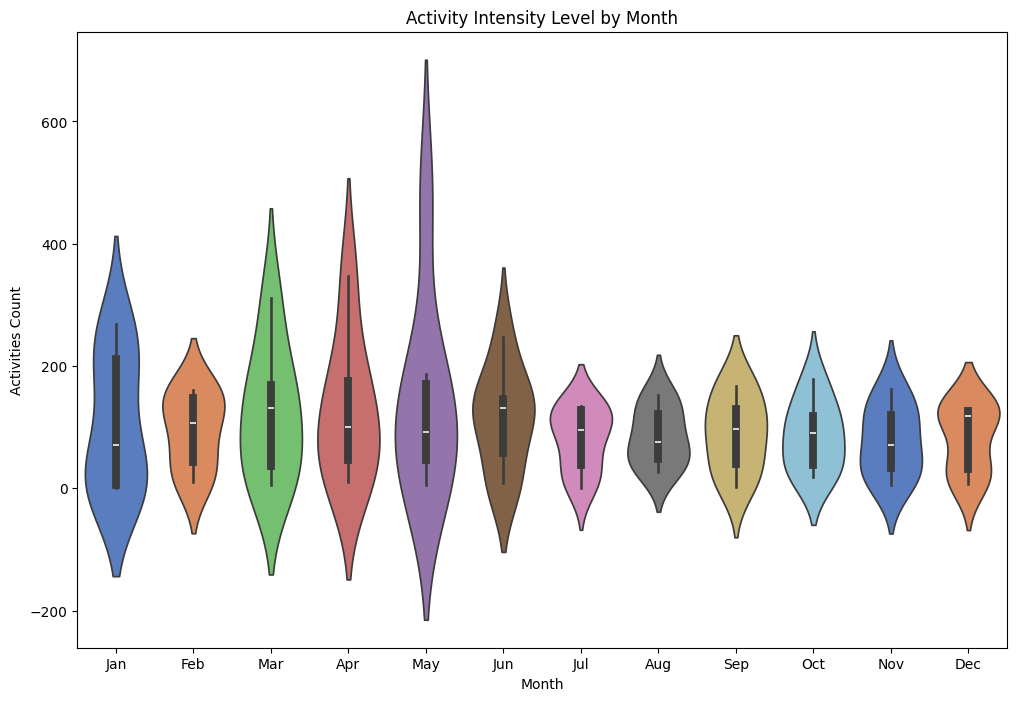

In [61]:
# Count the number of activities per month to determine intensity
monthly_activities = data.groupby(['year', 'month']).size().reset_index(name='activities_count')

# Create a violin plot to show the distribution of activities intensity across months
plt.figure(figsize=(12, 8))
sns.violinplot(x='month', y='activities_count', data=monthly_activities, palette='muted')
plt.title('Activity Intensity Level by Month')
plt.xlabel('Month')
plt.ylabel('Activities Count')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

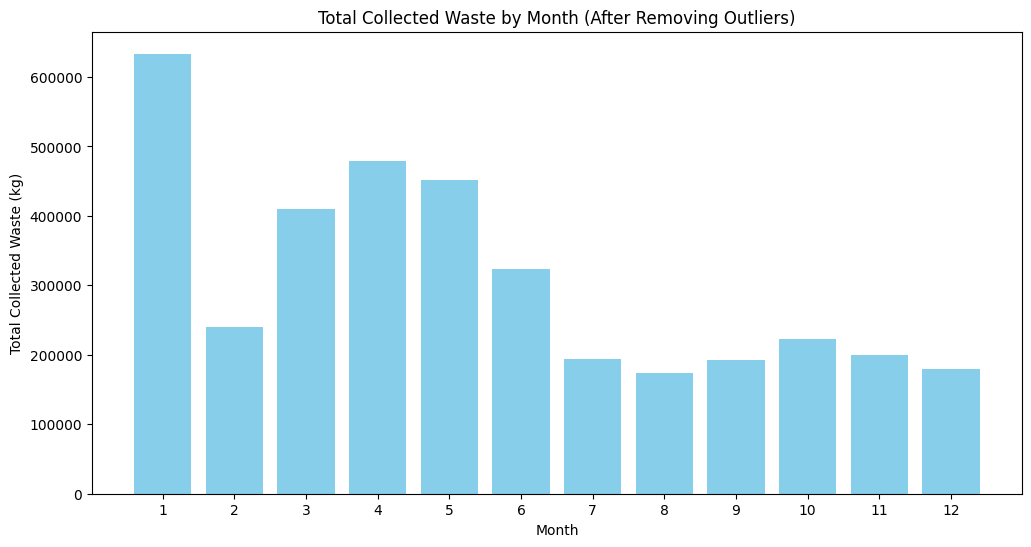

In [48]:
# calculate the toal of the month 
total_data_per_month_updated = data.groupby('month')['kg_of_collected_waste'].sum()

# plotting the bar chart for the toal waste by month
plt.figure(figsize=(12, 6))
plt.bar(total_data_per_month_updated.index, total_data_per_month_updated.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Collected Waste (kg)')
plt.title('Total Collected Waste by Month (After Removing Outliers)')
plt.xticks(total_data_per_month_updated.index)
plt.show()

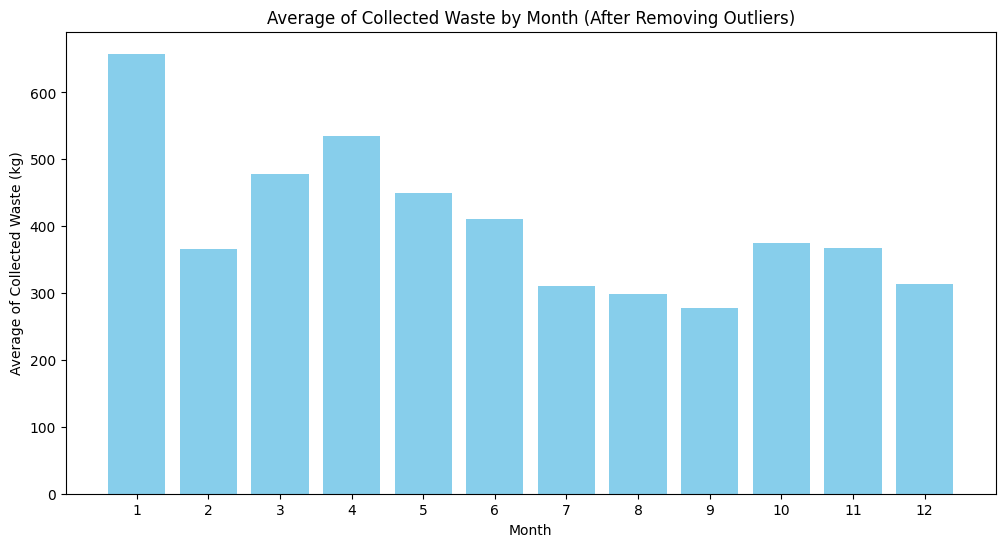

In [86]:
# calculate the average of the month 
average_data_per_month = data.groupby('month')['kg_of_collected_waste'].mean()

# plotting the bar chart for the toal waste by month
plt.figure(figsize=(12, 6))
plt.bar(average_data_per_month.index, average_data_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average of Collected Waste (kg)')
plt.title('Average of Collected Waste by Month (After Removing Outliers)')
plt.xticks(average_data_per_month.index)
plt.show()

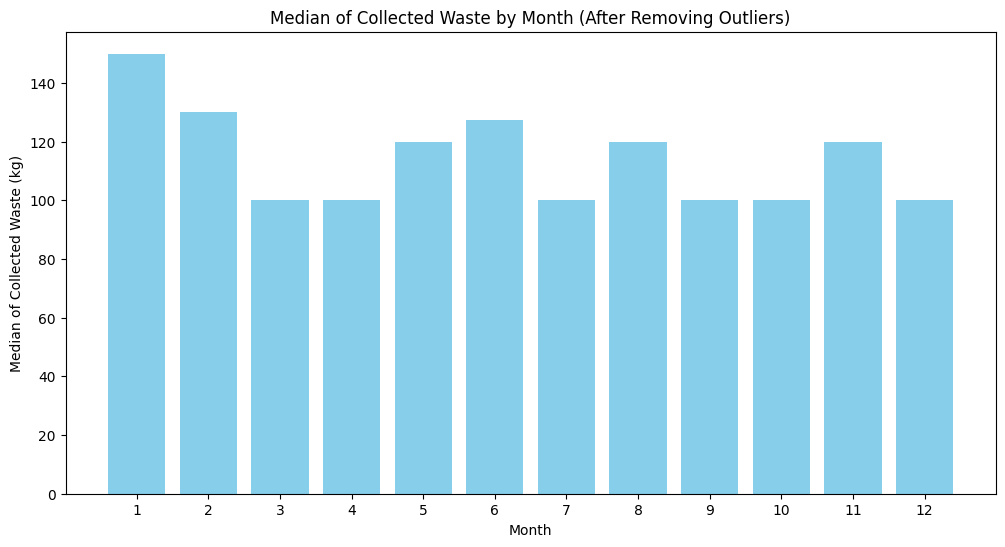

In [87]:
median_data_per_month = data.groupby('month')['kg_of_collected_waste'].median()

# calculate the toal of the month 
median_data_per_month = data.groupby('month')['kg_of_collected_waste'].median()

# plotting the bar chart for the toal waste by month
plt.figure(figsize=(12, 6))
plt.bar(median_data_per_month.index, median_data_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Median of Collected Waste (kg)')
plt.title('Median of Collected Waste by Month (After Removing Outliers)')
plt.xticks(median_data_per_month.index)
plt.show()

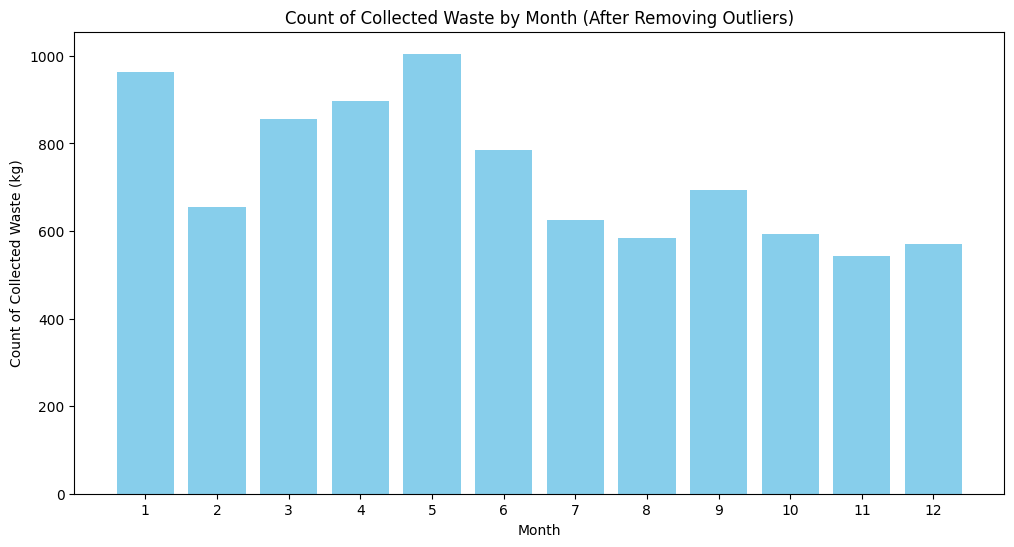

In [89]:
count_per_month = data.groupby('month')['kg_of_collected_waste'].count()
# plotting the bar chart for the toal waste by month
plt.figure(figsize=(12, 6))
plt.bar(count_per_month.index, count_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count of Collected Waste (kg)')
plt.title('Count of Collected Waste by Month (After Removing Outliers)')
plt.xticks(count_per_month.index)
plt.show()

### Missing data distribution

In [49]:
# Convert 'startdate' to datetime and extract the month and year for grouping
data['month_year'] = data['startdate'].dt.to_period('M')
missing_data['startdate'] = pd.to_datetime(missing_data['startdate'], errors='coerce')
missing_data['month_year'] = missing_data['startdate'].dt.to_period('M')

# Calculating the total and missing entries per month
total_entries_per_month = data.groupby('month_year').size()
missing_entries_per_month = missing_data.groupby('month_year').size()

# Preparing data for analysis
analysis_data = pd.DataFrame({
    'Total Entries': total_entries_per_month,
    'Missing Entries': missing_entries_per_month
}).fillna(0)

# Converting 'month_year' to string format for plotting
analysis_data.reset_index(inplace=True)
analysis_data['month_year'] = analysis_data['month_year'].astype(str)
analysis_data

/var/folders/4g/fzwy7zvn4n7_mt0hzjjtkfw40000gn/T/ipykernel_53236/3798297522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_year'] = data['startdate'].dt.to_period('M')
/var/folders/4g/fzwy7zvn4n7_mt0hzjjtkfw40000gn/T/ipykernel_53236/3798297522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['startdate'] = pd.to_datetime(missing_data['startdate'], errors='coerce')
/var/folders/4g/fzwy7zvn4n7_mt0hzjjtkfw40000gn/T/ipykernel_53236/3798297522.py:4: SettingWithCopyWarning: 
A val

,month_year,Total Entries,Missing Entries
0,2013-01,1,1.0
1,2014-01,1,1.0
2,2014-09,1,0.0
3,2015-01,3,1.0
4,2015-02,10,2.0
...,...,...,...
82,2021-08,75,53.0
83,2021-09,104,81.0
84,2021-10,102,77.0
85,2021-11,162,145.0


/var/folders/4g/fzwy7zvn4n7_mt0hzjjtkfw40000gn/T/ipykernel_3616/251547089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='activities_count', data=monthly_activities, palette='muted')


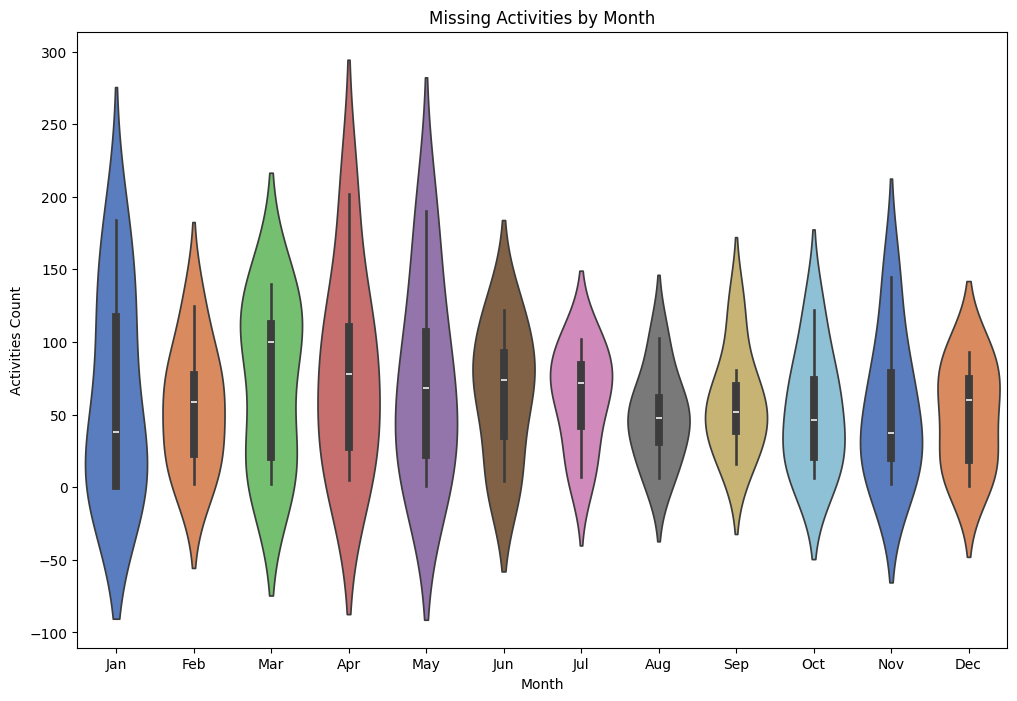

In [63]:
# Count the number of activities per month to determine intensity
monthly_activities = missing_data.groupby(['year', 'month']).size().reset_index(name='activities_count')

# Create a violin plot to show the distribution of activities intensity across months
plt.figure(figsize=(12, 8))
sns.violinplot(x='month', y='activities_count', data=monthly_activities, palette='muted')
plt.title('Missing Activities by Month')
plt.xlabel('Month')
plt.ylabel('Activities Count')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

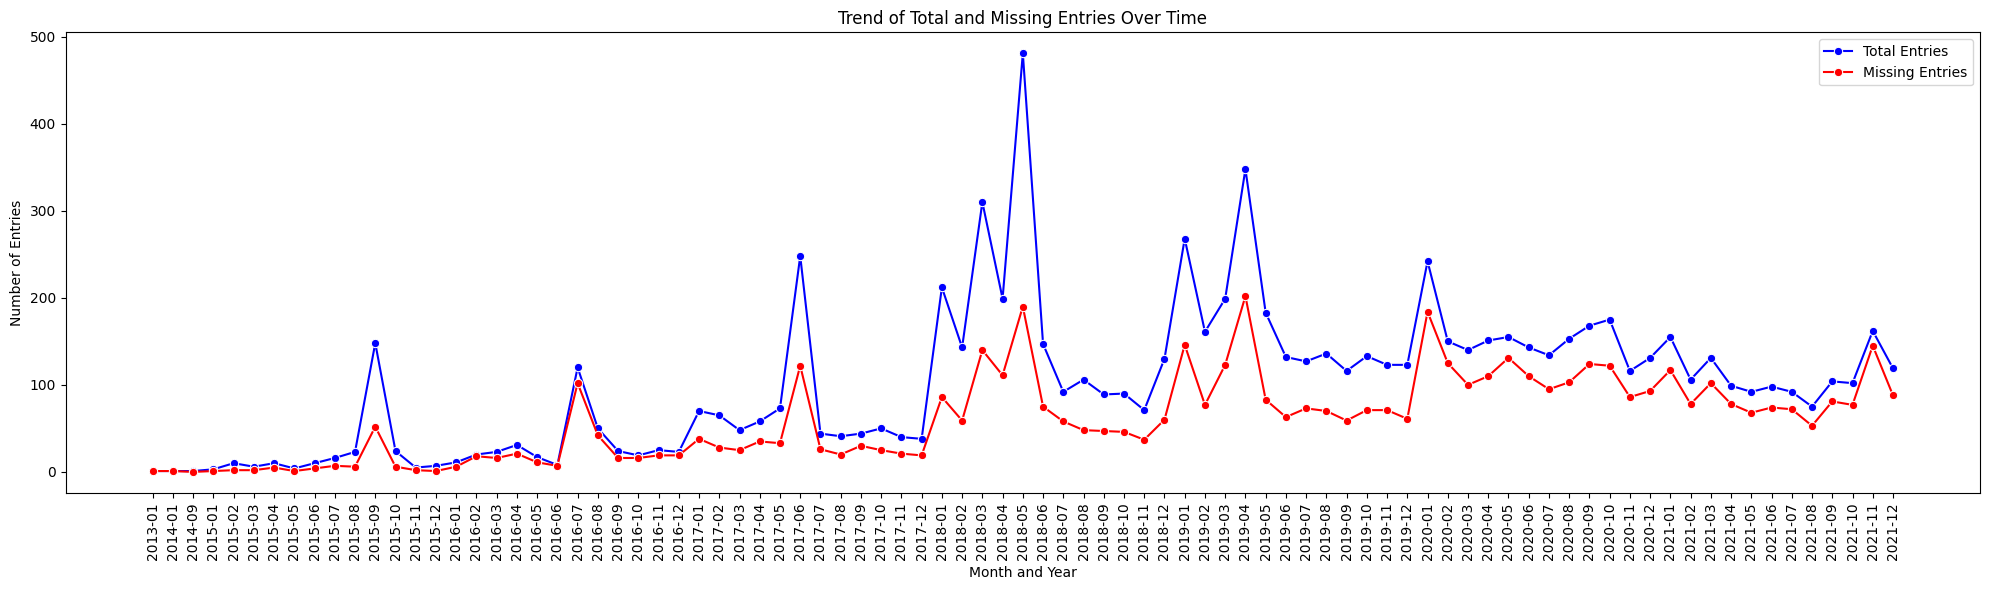

In [50]:
# plotting the trend of missing data over time

plt.figure(figsize=(20, 6))  
# Specify colors for each line plot
color_total = 'blue'
color_missing = 'red'

# Plotting each line with specified color
sns.lineplot(x='month_year', y='Total Entries', data=analysis_data, marker='o', color=color_total, label='Total Entries')
sns.lineplot(x='month_year', y='Missing Entries', data=analysis_data, marker='o', color=color_missing, label='Missing Entries')

plt.title('Trend of Total and Missing Entries Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)  # Rotate the labels to prevent overlap
plt.legend()  # The legend automatically uses the label and color specified in the lineplot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

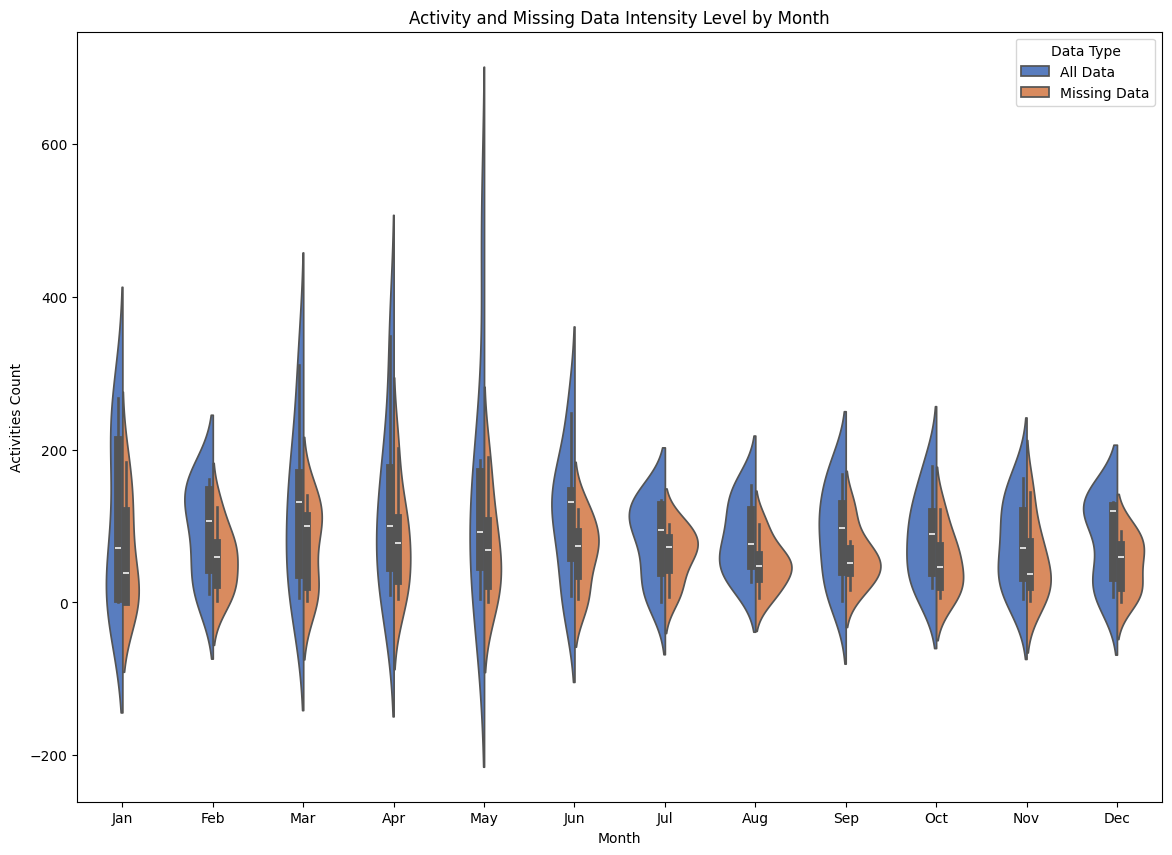

In [30]:
# plotting the missing data and total data distribution in each month
# Group by year and month for all data
monthly_activities = data.groupby(['year', 'month']).size().reset_index(name='activities_count')
monthly_activities['type'] = 'All Data'
# Count for missing data
monthly_missing_activities = missing_data.groupby(['year', 'month']).size().reset_index(name='activities_count')
monthly_missing_activities['type'] = 'Missing Data'

# Combine both datasets
combined_data = pd.concat([monthly_activities, monthly_missing_activities])

# Create a violin plot to show the distribution of activities intensity across months
plt.figure(figsize=(14, 10))
sns.violinplot(x='month', y='activities_count', hue='type', data=combined_data, palette='muted', split=True)
plt.title('Activity and Missing Data Intensity Level by Month')
plt.xlabel('Month')
plt.ylabel('Activities Count')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Data Type')
plt.show()

Wider sections of the violin plot indicate that, within a given month, there is a higher density of days (or activities, depending on the exact nature of the data) where the activity count falls within a certain range. It doesn't directly correlate to a specific year or range of years (e.g., 2010-2021) but rather to the count of activities within each month across all years included in the dataset.

When you mention "from 2010-2021, the activities counts from the years of that month fall more on the range," it sounds like you're interpreting the plot as showing data aggregated by year, which isn't the case here. The aggregation is by month, and the plot shows how activity counts vary within each month, combining data from all years.

### Assign weight

In [32]:
# Summarize activities per month across all years
activities_per_month = data.groupby('month').size()

# Calculate total activities across all months
total_activities = activities_per_month.sum()

# Calculate weights for each month
month_weights = activities_per_month / total_activities

# Convert the series to a DataFrame to read
month_weights_df = month_weights.reset_index(name='weight')
month_weights_df['month'] = month_weights_df['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
month_weights_df

,month,weight
0,Jan,0.109208
1,Feb,0.074270
2,Mar,0.096811
3,Apr,0.101544
4,May,0.114167
5,Jun,0.089823
6,Jul,0.072805
7,Aug,0.066945
8,Sep,0.080807
9,Oct,0.067734


In [35]:
# Convert the DataFrame to a dictionary with month numbers as keys and weights as values
month_weights_dict = month_weights_df.set_index('month').to_dict()['weight']

# Convert month names back to month numbers for the dictionary keys
month_weights = {pd.to_datetime(month, format='%b').month: weight for month, weight in month_weights_dict.items()}

# Output the formatted dictionary
month_weights


{1: 0.10920770877944326,
 2: 0.07427025808632931,
 3: 0.09681054885608024,
 4: 0.10154400991772794,
 5: 0.11416657274878846,
 6: 0.08982305871745745,
 7: 0.0728051391862955,
 8: 0.06694466358616026,
 9: 0.08080694240955709,
 10: 0.06773357376310155,
 11: 0.06130959089372253,
 12: 0.06457793305533642}

In [36]:
# # Assign weight to every month according to the activities intensity level
# month_weights = {
#     3: 1.2, 4: 1.2, 5: 1.2, 6: 1.2, # Higher weight for high intensity level
#     2: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, # medium level of intensity
#     1:0.8, 11: 0.8, 12: 0.8 # Lower weight for low intensity level
# }

### Calculate Data quality score by combine weights for every month, missing entries and missing percentage

#### total missing entries heatmap

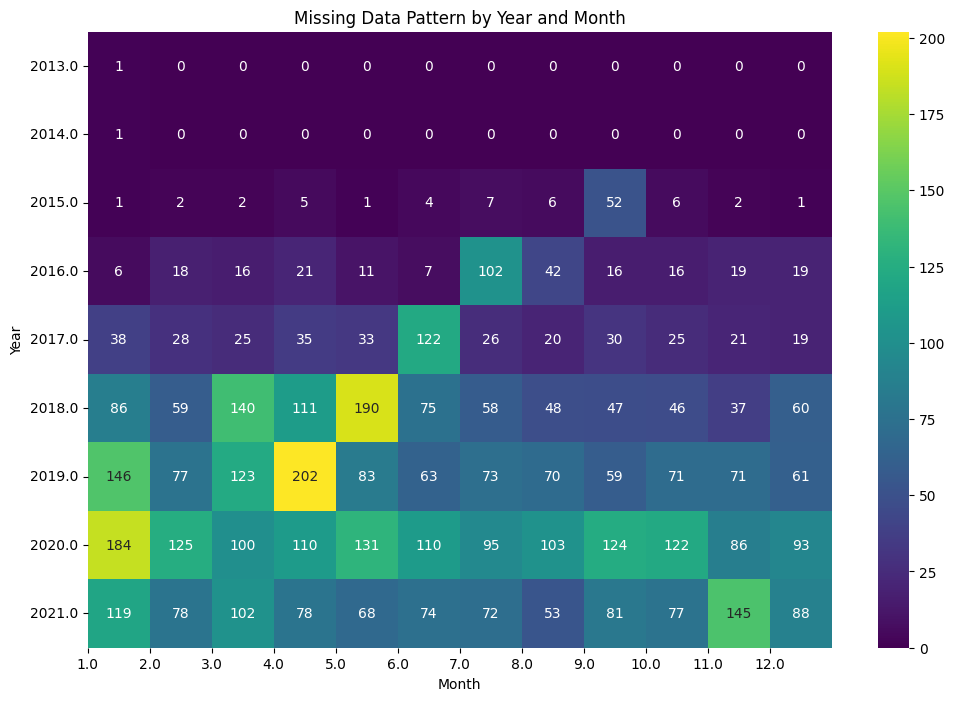

In [37]:
# Convert 'startdate' to datetime to extract year and month
data['startdate'] = pd.to_datetime(data['startdate'], errors='coerce')  # Ensure 'startdate' is datetime
data['year'] = data['startdate'].dt.year  # Extract year
data['month'] = data['startdate'].dt.month  # Extract month

# apply the condition to filter the dataset for missing data
data_filtered = data[(data['kg_of_collected_waste'] != 0) &
                     (data['personal_use'] == 0) &
                     (data['fisheries'] == 0) &
                     (data['industrial'] == 0) &
                     (data['hygiene'] == 0) &
                     (data['others'] == 0)]

# Group the filtered data by 'year' and 'month' to count missing entries
missing_entries_by_year_month = data_filtered.groupby(['year', 'month']).size()

# Pivot the results to prepare for heatmap visualization
missing_entries_pivot = missing_entries_by_year_month.unstack(level=-1, fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_entries_pivot, cmap="viridis", annot=True, fmt="d")
plt.title("Missing Data Pattern by Year and Month")
plt.ylabel("Year")
plt.xlabel("Month")
plt.xticks(ticks=range(len(missing_entries_pivot.columns)), labels=missing_entries_pivot.columns)
plt.yticks(rotation=0)
plt.show()

#### quality_score based on missing percentage in heatmap

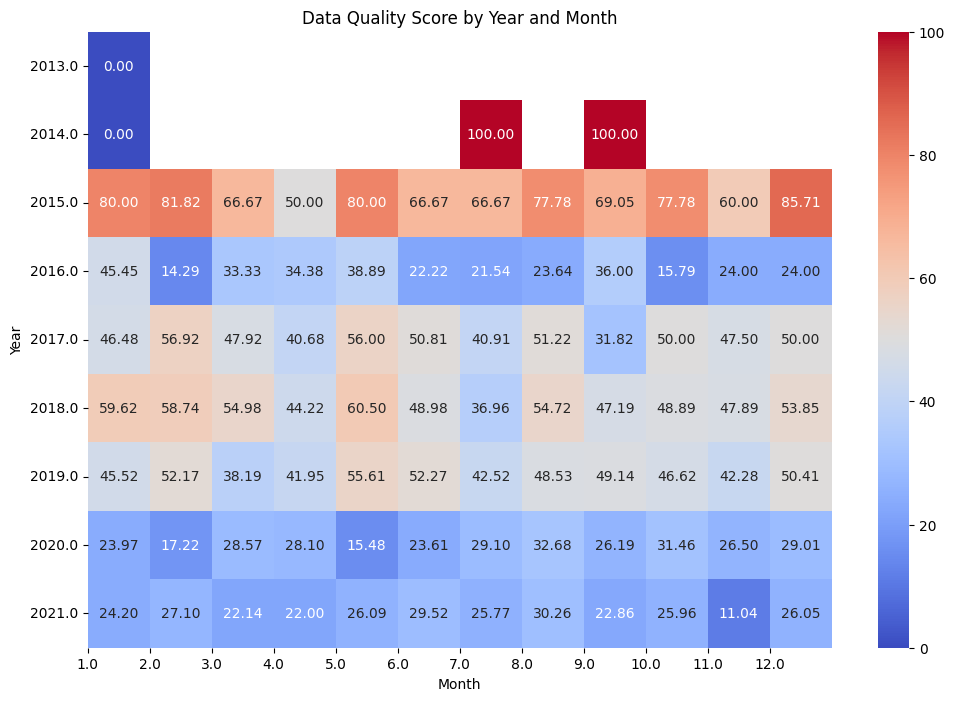

In [38]:
# Calculate total entries per month for the whole dataset
total_entries_per_month_whole = data.groupby(['year', 'month']).size()

# Calculate quality score for each month
quality_scores = 100 - ((missing_entries_by_year_month / total_entries_per_month_whole) * 100)

# Replace NaN scores with 100 for months with no missing data according to the condition
quality_scores_filled = quality_scores.fillna(100)

# Pivot the results to prepare for visualization
quality_scores_pivot = quality_scores_filled.unstack(level=-1)

# Plotting the quality scores as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(quality_scores_pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Data Quality Score by Year and Month")
plt.ylabel("Year")
plt.xlabel("Month")
plt.xticks(ticks=range(len(quality_scores_pivot.columns)), labels=quality_scores_pivot.columns)
plt.yticks(rotation=0)
plt.show()

#### composite_quality_score in heatmap

In [39]:
def plot_composite_quality_score_updated(w1, w2, month_weights):
    # Initialize composite_quality_score with a MultiIndex from the 'data' DataFrame
    years = sorted(data['year'].unique())
    months = range(1, 13)
    multi_index = pd.MultiIndex.from_product([years, months], names=["Year", "Month"])
    composite_quality_score = pd.Series(index=multi_index, dtype=float).fillna(0)  # Fill with 0 for months without data

    # Iterate over each year and month to calculate the composite score
    for year in years:
        for month in months:
            weight = month_weights.get(month, 1)  # Default weight is 1
            missing_score = inverse_missing_score.get((year, month), 0)  # Default missing score is 0 if not available
            quality_score = quality_scores_filled.get((year, month), 0)  # Default quality score is 0 if not available
            # Calculate weighted scores
            weighted_missing = missing_score * weight
            weighted_quality = quality_score * weight
            # Composite score calculation
            composite = (w1 * weighted_missing + w2 * weighted_quality) / (w1 + w2)
            composite_quality_score.loc[(year, month)] = composite

    # Convert the Series to a DataFrame for heatmap plotting
    composite_quality_score_df = composite_quality_score.unstack(level='Month')

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(composite_quality_score_df, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Composite Quality Score'})
    plt.title("Composite Data Quality Score by Year and Month")
    plt.ylabel("Year")
    plt.xlabel("Month")
    plt.show()

# Note: This function assumes 'inverse_missing_score' and 'quality_scores_filled' are available and indexed by (year, month).
# You might need to adjust 'inverse_missing_score' and 'quality_scores_filled' calculation according to your data.

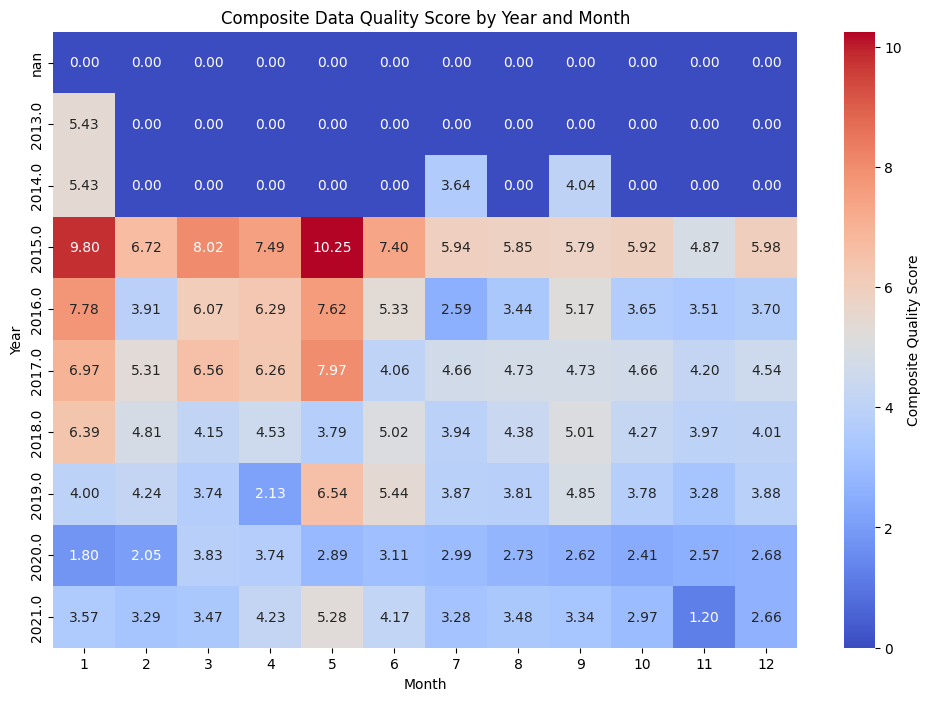

In [40]:
# Calculating the inverse score for missing data absolute values (higher missing count = lower score)
max_missing_count = missing_entries_by_year_month.max()
inverse_missing_score = 100 - ((missing_entries_by_year_month / max_missing_count) * 100)

# plotting the quality score by applying w1 and w2
w1=0.5
w2=0.5
plot_composite_quality_score_updated(w1, w2, month_weights)

From the data quality heatmap, we can see that 2013 and 2014 don't really provide much  uesful data. And obviously we have a better data quality in 2015 than other years, also Jan, March, April and May has relatively higher data quality than other months. 